# 날짜/시간 자료형
#### 판다스는 표준 시계열 도구와 알고리즘을 제공함
#### 날짜와 시간을 의미하는 datetime 자료형을 통해 시계열 데이터를 쉽게 조작할 수 있음.
#### 대량의 시계열 데이터를 판다스 메소드를 통해 쉽게 나누고 집계할 수 있음

In [2]:
from datetime import datetime #파이썬 모듈 

now = datetime.now() #현재시간을 할당한다. datetime.datetime.now()
print(now) #ms까지 표현한다.
print(type(now)) #datetime이라는 새로운 자료형 

2022-08-08 19:52:35.683063
<class 'datetime.datetime'>


In [3]:
now.year, now.month, now.day #datetime.datetime.now.year

(2022, 8, 8)

In [4]:
delta = datetime.now() - datetime(2021, 3, 10, 10, 20) #datetime(년,월,일,시,분,초,미리초), datetime자료형끼리의 산술연산
delta

datetime.timedelta(days=516, seconds=34450, microseconds=919212)

In [6]:
delta.days #delta는 자료형이 datetime 그것의 메소드(days)

516

In [7]:
delta.seconds

34450

In [9]:
from datetime import datetime, timedelta
date = datetime(2021, 5, 11)
date

datetime.datetime(2021, 5, 11, 0, 0)

In [10]:
print(date + timedelta(days=10)) #timedelta는 말그대로 시각의 증분인 시각
                                 #시각과 시각을 계산하는 경우도 있지만, 어떤 날로부터 몇일뒤,전 등을 계산할 수 있음 

<class 'datetime.timedelta'>
2021-05-21 00:00:00


In [ ]:
date - 2 * timedelta(days=10)

In [ ]:
date - timedelta(days=10, hours=23)

In [ ]:
date + timedelta(days=10, hours=12, minutes= 30)

## 문자열을 datetime으로 변환

In [11]:
date = datetime(2021, 5, 11, 10, 30, 50)

In [16]:
str(date)

'2021-05-11 10:30:50'

In [13]:
date.strftime('%Y-%m-%d') #datetime을 해당 포맷에 맞춰서 문자열로 반환함 

'2021-05-11'

In [ ]:
date_string = '2021-04-12'

In [ ]:
date = datetime.strptime(date_string, '%Y-%m-%d') #문자열을 datetime으로 반환함. 포맷은 문자열과 같아야함. date_string이 년-월-일이니까 그에 맞게
date #strftime, strptime 모두 세부규칙이 있음. 강의자료 참고 

In [18]:
date_strings = ['7/10/2021 10:20', '6/4/2020 16:30']

In [19]:
for date_string in date_strings:
    date = datetime.strptime(date_string, '%d/%m/%Y %H:%M')
    print(date)

2021-10-07 10:20:00
2020-04-06 16:30:00


## pandas 내 문자열을 datetime으로 변환
#### 데이터프레임안에서 datetime자료형을 관리할 수 있어야한다. 

In [20]:
import pandas as pd

conversion = pd.read_csv('./conversion.csv', delimiter='\t') #csv파일이 콤마가 아니라 tab으로 구분되어 있어서 delimiter을 따로 언급함 
conversion.head()

,date,amount,conversion_users,conversions
0,20200903,177500,5,5
1,20200904,382490,8,10
2,20200905,373590,11,13
3,20200906,2368590,17,18
4,20200907,1052300,28,32


In [21]:
conversion.info() #date는 자료형이 datetime이 아니라 그냥 정수형임. 날짜관련계산어려움.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   date              240 non-null    int64
 1   amount            240 non-null    int64
 2   conversion_users  240 non-null    int64
 3   conversions       240 non-null    int64
dtypes: int64(4)
memory usage: 7.6 KB


In [22]:
conversion['date'] = conversion['date'].astype(str) #date열의 자료형을 문자열로 바꿈 

In [23]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              240 non-null    object
 1   amount            240 non-null    int64 
 2   conversion_users  240 non-null    int64 
 3   conversions       240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.6+ KB


In [24]:
conversion['date_dt'] = pd.to_datetime(conversion['date'], format='%Y-%m-%d') 
#새로운 열 date_dt를 만듬
#먼저 date 열 데이터를 astype 메소드를 통해 문자열 데이터로 변환
#pd.to_datetime 메소드를 활용해 문자열 데이터를 datetime 자료형으로 변환

In [25]:
conversion.head()

,date,amount,conversion_users,conversions,date_dt
0,20200903,177500,5,5,2020-09-03
1,20200904,382490,8,10,2020-09-04
2,20200905,373590,11,13,2020-09-05
3,20200906,2368590,17,18,2020-09-06
4,20200907,1052300,28,32,2020-09-07


In [26]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              240 non-null    object        
 1   amount            240 non-null    int64         
 2   conversion_users  240 non-null    int64         
 3   conversions       240 non-null    int64         
 4   date_dt           240 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 9.5+ KB


In [27]:
test_df = pd.DataFrame(
    ['02/06/2021', '04/12/2021', '03/12/2021'],
    columns = ['date']
)

In [28]:
test_df

,date
0,02/06/2021
1,04/12/2021
2,03/12/2021


In [29]:
test_df['date_dt'] = pd.to_datetime(test_df['date'], format='%d/%m/%Y') #date열의 포맷과 같아야함.

In [30]:
test_df

,date,date_dt
0,02/06/2021,2021-06-02
1,04/12/2021,2021-12-04
2,03/12/2021,2021-12-03


In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3 non-null      object        
 1   date_dt  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes


## read_csv에서 datetime 변환하기
#### parse_dates, date_parser옵션을 이용하여 데이터를 읽을 때 datetime으로 한번에 변환 

In [32]:
import pandas as pd

parse_date = lambda x : datetime.strptime(x, '%Y%m%d') #문자열->datetime 변환 x는 문자열이 위치하고, 문자열의 포맷과 같아야함. 
conversion = pd.read_csv('./conversion.csv', delimiter='\t',
                         parse_dates = ['date'], date_parser = parse_date)
#date열을 파싱한 다음, 어떤 모양의 datetime으로 출력할지 정한다.
#메커니즘이 잘 이해가 안감. 
conversion.head()


,date,amount,conversion_users,conversions
0,2020-09-03,177500,5,5
1,2020-09-04,382490,8,10
2,2020-09-05,373590,11,13
3,2020-09-06,2368590,17,18
4,2020-09-07,1052300,28,32


In [33]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              240 non-null    datetime64[ns]
 1   amount            240 non-null    int64         
 2   conversion_users  240 non-null    int64         
 3   conversions       240 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.6 KB


# datetime 조작하기

## dt 사용하기

In [34]:
import pandas as pd

conversion = pd.read_csv('./conversion.csv', delimiter='\t', parse_dates = ['date'])
conversion.head()

,date,amount,conversion_users,conversions
0,2020-09-03,177500,5,5
1,2020-09-04,382490,8,10
2,2020-09-05,373590,11,13
3,2020-09-06,2368590,17,18
4,2020-09-07,1052300,28,32


In [37]:
conversion['year'] = conversion['date'].dt.year
conversion['month'] = conversion['date'].dt.month
conversion['day'] = conversion['date'].dt.day
#새로운 열 추가

In [38]:
conversion.head()

,date,amount,conversion_users,conversions,year,month,day
0,2020-09-03,177500,5,5,2020,9,3
1,2020-09-04,382490,8,10,2020,9,4
2,2020-09-05,373590,11,13,2020,9,5
3,2020-09-06,2368590,17,18,2020,9,6
4,2020-09-07,1052300,28,32,2020,9,7


In [39]:
conversion['date_yr'] = conversion['date'].dt.to_period(freq='A')
conversion['date_m'] = conversion['date'].dt.to_period(freq='M')
#주기데이터의 의미?

In [40]:
conversion.head()

,date,amount,conversion_users,conversions,year,month,day,date_yr,date_m
0,2020-09-03,177500,5,5,2020,9,3,2020,2020-09
1,2020-09-04,382490,8,10,2020,9,4,2020,2020-09
2,2020-09-05,373590,11,13,2020,9,5,2020,2020-09
3,2020-09-06,2368590,17,18,2020,9,6,2020,2020-09
4,2020-09-07,1052300,28,32,2020,9,7,2020,2020-09


In [41]:
conversion.info() #주기데이터는 새로운 자료형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              240 non-null    datetime64[ns]
 1   amount            240 non-null    int64         
 2   conversion_users  240 non-null    int64         
 3   conversions       240 non-null    int64         
 4   year              240 non-null    int64         
 5   month             240 non-null    int64         
 6   day               240 non-null    int64         
 7   date_yr           240 non-null    period[A-DEC] 
 8   date_m            240 non-null    period[M]     
dtypes: datetime64[ns](1), int64(6), period[A-DEC](1), period[M](1)
memory usage: 17.0 KB


## 날짜 인덱스 사용하기
#### datetime을 인덱스로 사용하면 시계열 데이터에 대한 인덱싱과 슬라이싱이 편함

In [42]:
import pandas as pd

conversion = pd.read_csv('./conversion.csv', delimiter='\t', parse_dates = ['date'])
conversion.set_index('date', inplace=True) #date열을 index로 사용한다.
conversion.head()

,amount,conversion_users,conversions
date,,,
2020-09-03,177500,5,5
2020-09-04,382490,8,10
2020-09-05,373590,11,13
2020-09-06,2368590,17,18
2020-09-07,1052300,28,32


In [43]:
conversion.index

DatetimeIndex(['2020-09-03', '2020-09-04', '2020-09-05', '2020-09-06',
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-12',
               ...
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='date', length=240, freq=None)

In [45]:
tmp_df = conversion['2021'] #데이터프레임의 인덱스가 datetime이라면 df[]안에 열 뿐만아니라 index의 년, 년월 이런식으로 행을 뽑을 수 있음 
tmp_df.head()

C:\Users\swlee\AppData\Local\Temp\ipykernel_10580\1726956490.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tmp_df = conversion['2021'] #데이터프레임의 인덱스가 datetime이라면 df[]안에 열 뿐만아니라 index의 년, 년월 이런식으로 행을 뽑을 수 있음


,amount,conversion_users,conversions
date,,,
2021-01-01,720460,22,24
2021-01-02,679240,17,19
2021-01-03,593960,16,16
2021-01-04,513820,11,12
2021-01-05,654540,11,12


In [46]:
tmp_df = conversion['2020-12']
tmp_df.head()

C:\Users\swlee\AppData\Local\Temp\ipykernel_10580\729408916.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tmp_df = conversion['2020-12']


,amount,conversion_users,conversions
date,,,
2020-12-01,1047600,32,33
2020-12-02,1011170,28,30
2020-12-03,418810,14,15
2020-12-04,421090,15,18
2020-12-05,446300,13,13


In [47]:
tmp_df = conversion.loc['2020-12-01':'2020-12-15'] #슬라이싱 가능 
print(len(tmp_df)) #행의 개수
tmp_df.tail()

15


,amount,conversion_users,conversions
date,,,
2020-12-11,5434670,45,53
2020-12-12,558800,15,17
2020-12-13,1181560,22,25
2020-12-14,538750,17,18
2020-12-15,1398250,20,22


In [48]:
tmp_df = conversion.loc[:'2020-12-15', 'amount':'conversion_users'] #처음부터~ 2020-12-15행과 amount~conversion_users열의 교집합 
tmp_df.head()

,amount,conversion_users
date,,
2020-09-03,177500,5
2020-09-04,382490,8
2020-09-05,373590,11
2020-09-06,2368590,17
2020-09-07,1052300,28


In [49]:
today = pd.to_datetime('2021-05-01') #pandas에서 문자열을 datetime으로 변환 
conversion['time_delta'] = today - conversion.index #today datetime 변수 - 행index
conversion.set_index('time_delta', inplace=True) #time_delta를 index로 하겠다.
conversion.head()

,amount,conversion_users,conversions
time_delta,,,
240 days,177500,5,5
239 days,382490,8,10
238 days,373590,11,13
237 days,2368590,17,18
236 days,1052300,28,32


In [50]:
within_30days = conversion['30 days':] #30days 이하로 새로운 데이터 프레임을 만듬 
print(len(within_30days)) #30days 이하가 몇개? 
within_30days.head()

#이처럼 datetime 변수로 만들고 그들끼리의 계산으로 새로운 열을 만들고 그걸 index로 해서 편하게 슬라이싱해서 원하는 데이터를 얻을 수 있다 

30


,amount,conversion_users,conversions
time_delta,,,
30 days,869590,15,20
29 days,885720,5,5
28 days,832900,15,18
27 days,427350,14,15
26 days,2018221,18,19


# 시계열 데이터 분석하기

In [51]:
import pandas as pd

conversion = pd.read_csv('./conversion.csv', delimiter='\t')
conversion['date'] = conversion['date'].astype(str) #date열을 문자열로 변환한 다음 
conversion['date_dt'] = pd.to_datetime(conversion['date'], format='%Y-%m-%d') #문자열의 format에 맞게 datetime으로 변경한다. 그걸로 새로운 열을 만든다.
conversion.head()

,date,amount,conversion_users,conversions,date_dt
0,20200903,177500,5,5,2020-09-03
1,20200904,382490,8,10,2020-09-04
2,20200905,373590,11,13,2020-09-05
3,20200906,2368590,17,18,2020-09-06
4,20200907,1052300,28,32,2020-09-07


In [53]:
# 최초 매출 발생일
min_dt = conversion['date_dt'].min() #가장 오래된 날짜. 
min_dt

Timestamp('2020-09-03 00:00:00')

In [55]:
# 가장 최근 매출 발생일
max_dt = conversion['date_dt'].max()
max_dt

Timestamp('2021-04-30 00:00:00')

In [56]:
conversion['dday'] = conversion['date_dt'] - min_dt
conversion.head()
#최초 매출 발생일로 부터 날짜를 뺀 값으로 이루어진 dday

,date,amount,conversion_users,conversions,date_dt,dday
0,20200903,177500,5,5,2020-09-03,0 days
1,20200904,382490,8,10,2020-09-04,1 days
2,20200905,373590,11,13,2020-09-05,2 days
3,20200906,2368590,17,18,2020-09-06,3 days
4,20200907,1052300,28,32,2020-09-07,4 days


## 일자별 데이터 분포

<AxesSubplot:xlabel='date_dt'>

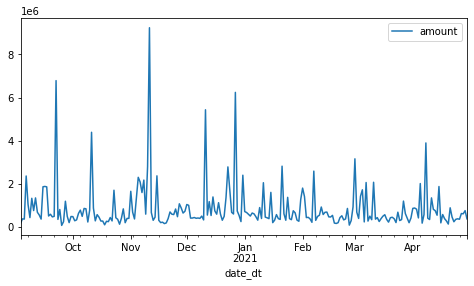

In [57]:
import matplotlib.pyplot as plt

conversion.plot(x='date_dt', y='amount', figsize=(8, 4)) 
#월,일 날짜 분포를 x축으로 하면 그 date의 분포에 따라 아래 그래프처럼 x축이 자동으로 깔끔하게 구성됨
#아래 그래프는 어떤 것을 의미하는지 모름
#이럴 때는 월별로 정리하면 의미를 파악할 수 있다. 즉 x축 datetime의 범위를 조절하여 의미있는 date를 뽑아낸다. 

## 일별 분포 비교하기

In [58]:
import pandas as pd

conversion = pd.read_csv('./conversion.csv', delimiter='\t')
conversion['date'] = conversion['date'].astype(str)
conversion['date_dt'] = pd.to_datetime(conversion['date'], format='%Y-%m-%d')
conversion.head()

,date,amount,conversion_users,conversions,date_dt
0,20200903,177500,5,5,2020-09-03
1,20200904,382490,8,10,2020-09-04
2,20200905,373590,11,13,2020-09-05
3,20200906,2368590,17,18,2020-09-06
4,20200907,1052300,28,32,2020-09-07


In [60]:
conversion['date_m'] = conversion['date_dt'].dt.to_period(freq='M') #period자료형 
conversion['date_m'] = conversion['date_m'].astype(str) #문자형으로변환 
conversion['day'] = conversion['date_dt'].dt.day

In [61]:
conversion.head()

,date,amount,conversion_users,conversions,date_dt,date_m,day
0,20200903,177500,5,5,2020-09-03,2020-09,3
1,20200904,382490,8,10,2020-09-04,2020-09,4
2,20200905,373590,11,13,2020-09-05,2020-09,5
3,20200906,2368590,17,18,2020-09-06,2020-09,6
4,20200907,1052300,28,32,2020-09-07,2020-09,7


In [62]:
conversion.set_index('date_dt', inplace=True) #datetime인 date_dt로 index

In [63]:
new_df = conversion.loc['2021'] #2021인 행으로 새로운 dateframe만들고 

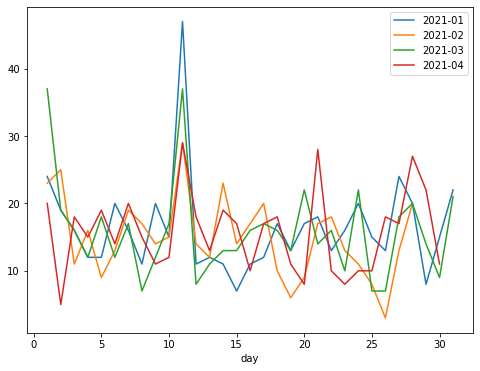

In [64]:
fig, ax = plt.subplots(figsize=(8,6))

for key, grp in new_df.groupby(['date_m']): #여기는 str 자료형만 가능 그래서 변환한거고 , 같은 년-월로 그룹을 지어 
    ax = grp.plot(ax=ax, kind='line', x='day', y='conversions', label=key)#이건 좀더 자세히 생각해야할 듯 

plt.legend(loc='best')
plt.show()
#월별로 각각의 일별로 보니 월마다 11일정도에 매출이 가장 높음을 알 수 있음 
#위의 그래프는 한번에 봐서 잘 안보임 

## 월별 데이터 분포

In [ ]:
conversion['month'] = conversion['date_dt'].dt.month
conversion['year'] = conversion['date_dt'].dt.year

In [ ]:
conversion.head()

In [ ]:
conversion_year_q = conversion.groupby(['year', 'month'])[['amount', 'conversions']].sum()

In [ ]:
conversion_year_q

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
conversion_year_q['amount'].plot()
plt.show()
plt.figure(figsize=(8, 3))
conversion.plot(x='date_dt', y='amount', figsize=(8, 4))
plt.show()